<a href="https://colab.research.google.com/github/LucioJuniorMachado/Trabalho_LUI/blob/main/TRABALHO_LUI_LUCIO_JUNIOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

intalação das bibliotecas necessárias para rodar o selenium


In [1]:
%%shell

cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF


apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg


cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.WnbtXIQOlY/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.u8N4vnW7ZH/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.xhyrFLkcQK/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [2]:
!apt-get update
!apt-get install chromium chromium-driver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip3 install selenium==4.9.1

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:11 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:14 https://ppa.laun

In [3]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from selenium.webdriver.chrome.options import Options # https://peter.sh/experiments/chromium-command-line-switches/

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--start-maximized')
chrome_options.add_argument('--user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.2 Safari/605.1.15') # TROCANDO O USER-AGENT Mozilla/5.0 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.53 Safari/537.36
chrome_options.add_argument('--ignore-certificate-errors')
chrome_options.add_argument('--window-size=1024x768')
wd = webdriver.Chrome('chromedriver',options=chrome_options, service_args=['--verbose', '--log-path=/tmp/chromedriver.log'])

# Iniciando o processo de web-scrapping com selenium

In [4]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

todos os cookies da página foram deletados

In [5]:
wd.delete_all_cookies()

acessei a página web

In [39]:
wd.get("https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250")

visualizei a página web e fiz um print

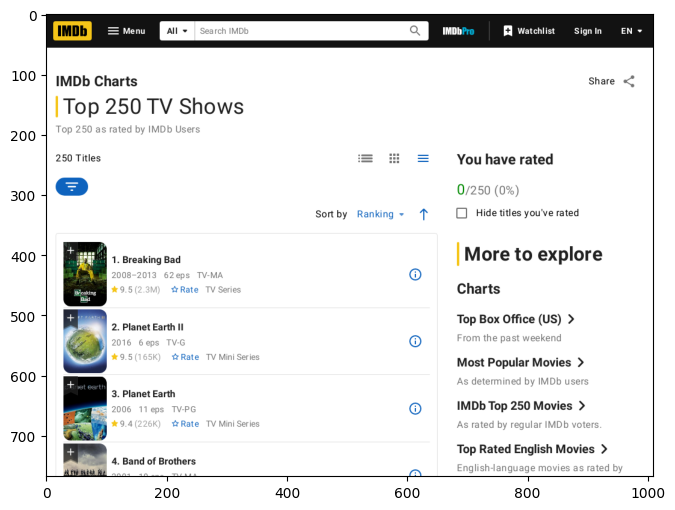

In [40]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

acessei o botão "Sort By"

In [41]:
try:
  accept_button_popup = wd.find_element(By.XPATH, "//button[@class='BtnPair__RejectBtn']")
  accept_button_popup.click()
except:
  pass

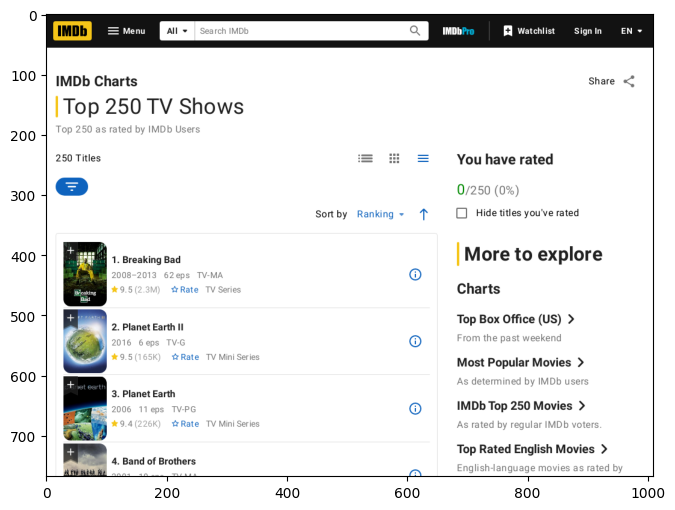

In [42]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

visualizei o botão "Sort By" e cliquei nele, descobrindo suas opções

In [43]:
wd.find_element(By.XPATH,"//select[@class='ipc-simple-select__input']").text

'Ranking\nIMDb rating\nRelease date\nNumber of ratings\nAlphabetical\nPopularity\nRuntime'

salvei numa variável tv_shows_sort_by as opções do botão "Sort By"

In [44]:
from selenium.webdriver.support.ui import Select

tv_shows_sort_by = Select(wd.find_element(By.XPATH,"//select[@class='ipc-simple-select__input']"))
print([i.text for i in tv_shows_sort_by.options])


['Ranking', 'IMDb rating', 'Release date', 'Number of ratings', 'Alphabetical', 'Popularity', 'Runtime']


In [45]:
tv_shows_sort_by

escolhi a opção sexta por select_by_index no botão "Sort by"

In [48]:
tv_shows_sort_by.select_by_index("5")

fiz um novo print da tela para visualizar se o botão foi para a sexta sessão

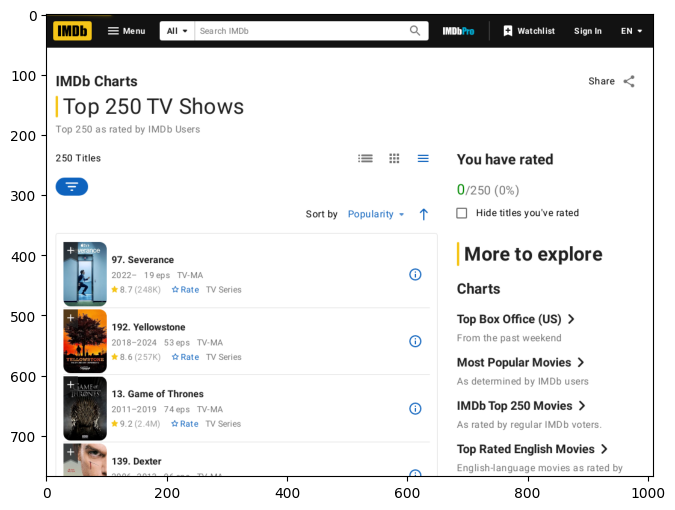

In [49]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

instalei outras bibliotecas necessárias para o selenium

In [37]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

dei uma espera de 10 segundo para localizar o elemento na div[2] da seleção

In [50]:
# Wait for the element to load (adjust the timeout as needed)
wait = WebDriverWait(wd, 10)
element = wait.until(EC.presence_of_element_located((By.XPATH, "//*[@id='__next']/main/div/div[3]/section/div/div[2]/div/ul/li[1]/div[2]")))

Peguei pelo XPATH os dez primeiros tv_shows por seus tittle, year, episodes, rating, votes, image e imprimi as informações

In [17]:
# Wait for the list (ul) element to load
wait = WebDriverWait(wd, 10)
ul_element = wait.until(EC.presence_of_element_located((By.XPATH, "//*[@id='__next']/main/div/div[3]/section/div/div[2]/div/ul")))

# Get the first 10 li elements
li_elements = ul_element.find_elements(By.XPATH, ".//li")

# Loop through the first 10 elements and extract data
for i in range(min(10, len(li_elements))):
    li = li_elements[i]
    try:
        # Extract the title and other relevant information from each line
        title = li.find_element(By.XPATH, ".//div[2]//h3").text  # This is the title text
        year = li.find_element(By.XPATH, ".//div[2]//span[1]").text  # This is the year text (e.g., "2008–2013")
        episodes = li.find_element(By.XPATH, ".//div[2]//span[2]").text  # Episodes count
        rating = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--rating']").text  # Rating
        votes = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--voteCount']").text  # Vote count
        image = li.find_element(By.XPATH, ".//img").get_attribute("ipc-lockup-overlay__screen") # Image
        # Attempt to get the show type (TV Series)
        try:
            type_of_show = li.find_element(By.XPATH, ".//div[@class='sc-300a8231-6']").text  # Adjusted XPath for TV Series
        except:
            type_of_show = "Unknown"  # Fallback value if the type is not found

        # Print the extracted information
        print(f"Title: {title}")
        print(f"Year: {year}")
        print(f"Episodes: {episodes}")
        print(f"Rating: {rating}")
        print(f"Votes: {votes}")
        print(f"Type: {type_of_show}")
        print(f"Image: {image}")
        print("-" * 40)  # Separating lines for readability
    except Exception as e:
        print(f"Error extracting data for row {i + 1}: {e}")


Title: 97. Severance
Year: 
Episodes: 19 eps
Rating: 8.7
Votes:  (248K)
Type: Unknown
Image: None
----------------------------------------
Title: 192. Yellowstone
Year: 
Episodes: 53 eps
Rating: 8.6
Votes:  (257K)
Type: Unknown
Image: None
----------------------------------------
Title: 13. Game of Thrones
Year: 
Episodes: 74 eps
Rating: 9.2
Votes:  (2.4M)
Type: Unknown
Image: None
----------------------------------------
Title: 139. Dexter
Year: 
Episodes: 96 eps
Rating: 8.6
Votes:  (819K)
Type: Unknown
Image: None
----------------------------------------
Title: 1. Breaking Bad
Year: 
Episodes: 62 eps
Rating: 9.5
Votes:  (2.3M)
Type: Unknown
Image: None
----------------------------------------
Title: 72. Twin Peaks
Year: 
Episodes: 30 eps
Rating: 8.8
Votes:  (226K)
Type: Unknown
Image: None
----------------------------------------
Title: 9. The Sopranos
Year: 
Episodes: 86 eps
Rating: 9.2
Votes:  (509K)
Type: Unknown
Image: None
----------------------------------------
Title: 25. Arca

fiz um looping através dos dez primeiros elementos

In [18]:
# Initialize an empty list to hold the extracted data
extracted_data = []

# Loop through the first 10 elements and extract data
for i in range(min(10, len(li_elements))):
    li = li_elements[i]
    try:
        # Extract the title and other relevant information from each line
        title = li.find_element(By.XPATH, ".//div[2]//h3").text  # This is the title text
        year = li.find_element(By.XPATH, ".//div[2]//span[1]").text  # This is the year text (e.g., "2008–2013")
        episodes = li.find_element(By.XPATH, ".//div[2]//span[2]").text  # Episodes count
        rating = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--rating']").text  # Rating
        votes = li.find_element(By.XPATH, ".//span[@class='ipc-rating-star--voteCount']").text  # Vote count
        image = li.find_element(By.XPATH, ".//img").get_attribute("ipc-lockup-overlay__screen")
        # Attempt to get the show type (TV Series)
        try:
            type_of_show = li.find_element(By.XPATH, ".//div[@class='sc-300a8231-6']").text  # Adjusted XPath for TV Series
        except:
            type_of_show = "Unknown"  # Fallback value if the type is not found

        # Append the extracted data as a dictionary to the list
        extracted_data.append({
            "Title": title,
            "Year": year,
            "Episodes": episodes,
            "Rating": rating,
            "Votes": votes,
            "Type": type_of_show, # Added a comma here
            "Image": image
        })

    except Exception as e:
        print(f"Error extracting data for row {i + 1}: {e}")

importei a biblioteca pandas

In [19]:
import pandas as pd

criei um dataframe para extrair os dados

In [20]:
# After the loop, create a DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

# Print the DataFrame
print(df)

                 Title Year Episodes Rating    Votes     Type Image
0        97. Severance        19 eps    8.7   (248K)  Unknown  None
1     192. Yellowstone        53 eps    8.6   (257K)  Unknown  None
2  13. Game of Thrones        74 eps    9.2   (2.4M)  Unknown  None
3          139. Dexter        96 eps    8.6   (819K)  Unknown  None
4      1. Breaking Bad        62 eps    9.5   (2.3M)  Unknown  None
5       72. Twin Peaks        30 eps    8.8   (226K)  Unknown  None
6      9. The Sopranos        86 eps    9.2   (509K)  Unknown  None
7           25. Arcane        18 eps    9.0   (372K)  Unknown  None
8   43. True Detective        31 eps    8.9   (688K)  Unknown  None
9          143. Shōgun        12 eps    8.6   (202K)  Unknown  None


fiz a operação de ordenação do dataframe a partir de 'Rating' e imprimi os resultados

In [21]:
df_sorted = df.sort_values(by='Rating', ascending=False)
print(df_sorted)

                 Title Year Episodes Rating    Votes     Type Image
4      1. Breaking Bad        62 eps    9.5   (2.3M)  Unknown  None
2  13. Game of Thrones        74 eps    9.2   (2.4M)  Unknown  None
6      9. The Sopranos        86 eps    9.2   (509K)  Unknown  None
7           25. Arcane        18 eps    9.0   (372K)  Unknown  None
8   43. True Detective        31 eps    8.9   (688K)  Unknown  None
5       72. Twin Peaks        30 eps    8.8   (226K)  Unknown  None
0        97. Severance        19 eps    8.7   (248K)  Unknown  None
1     192. Yellowstone        53 eps    8.6   (257K)  Unknown  None
3          139. Dexter        96 eps    8.6   (819K)  Unknown  None
9          143. Shōgun        12 eps    8.6   (202K)  Unknown  None


fiz a operação de filtragem a partir de 'Rating' e imprimi os resultados

In [22]:
filtered_df = df[df['Rating'].astype(float) > 9]

# Print the filtered DataFrame
print(filtered_df)

                 Title Year Episodes Rating    Votes     Type Image
2  13. Game of Thrones        74 eps    9.2   (2.4M)  Unknown  None
4      1. Breaking Bad        62 eps    9.5   (2.3M)  Unknown  None
6      9. The Sopranos        86 eps    9.2   (509K)  Unknown  None


fiz a operação de filtragem a partir de 'Episodes' e imprimi os resultados

In [23]:
# Extract only numeric part from the 'Episodes' column before converting to float
df['Episodes'] = df['Episodes'].astype(str).str.extract('(\d+)').astype(float)

# Now, you can apply the filter
filtered_df = df[df['Episodes'] > 9]

# Print the filtered DataFrame
print(filtered_df)

                 Title Year  Episodes Rating    Votes     Type Image
0        97. Severance           19.0    8.7   (248K)  Unknown  None
1     192. Yellowstone           53.0    8.6   (257K)  Unknown  None
2  13. Game of Thrones           74.0    9.2   (2.4M)  Unknown  None
3          139. Dexter           96.0    8.6   (819K)  Unknown  None
4      1. Breaking Bad           62.0    9.5   (2.3M)  Unknown  None
5       72. Twin Peaks           30.0    8.8   (226K)  Unknown  None
6      9. The Sopranos           86.0    9.2   (509K)  Unknown  None
7           25. Arcane           18.0    9.0   (372K)  Unknown  None
8   43. True Detective           31.0    8.9   (688K)  Unknown  None
9          143. Shōgun           12.0    8.6   (202K)  Unknown  None


fiz a operação de pivotamento a partir de 'Rating' e 'Title' e imprimi o resultado

In [24]:
df_pivot = df.set_index(['Rating', 'Title']) # Changed [] to () around ['Rating', 'Title']
print(df_pivot)

                           Year  Episodes    Votes     Type Image
Rating Title                                                     
8.7    97. Severance                 19.0   (248K)  Unknown  None
8.6    192. Yellowstone              53.0   (257K)  Unknown  None
9.2    13. Game of Thrones           74.0   (2.4M)  Unknown  None
8.6    139. Dexter                   96.0   (819K)  Unknown  None
9.5    1. Breaking Bad               62.0   (2.3M)  Unknown  None
8.8    72. Twin Peaks                30.0   (226K)  Unknown  None
9.2    9. The Sopranos               86.0   (509K)  Unknown  None
9.0    25. Arcane                    18.0   (372K)  Unknown  None
8.9    43. True Detective            31.0   (688K)  Unknown  None
8.6    143. Shōgun                   12.0   (202K)  Unknown  None


acessei a página do tv_show Severance

In [25]:
wd.get("https://www.imdb.com/title/tt11280740/?ref_=chttvtp_t_1")

fiz um print da tela

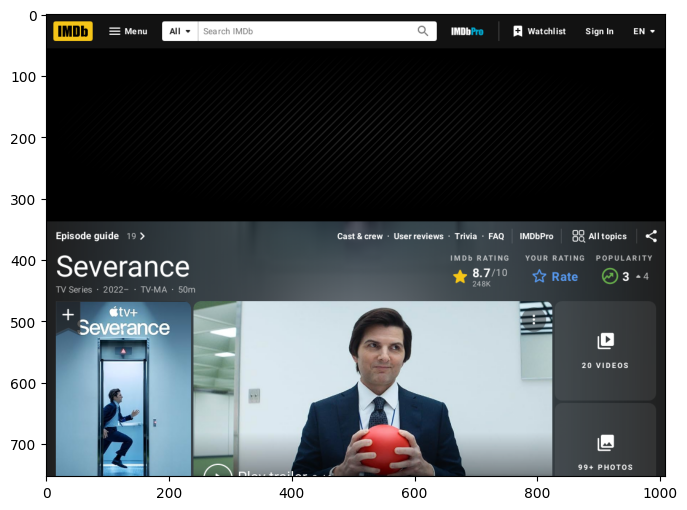

In [26]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

figure = wd.find_elements(By.XPATH, '/html')[0].screenshot_as_png
im = Image.open(BytesIO(figure))
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

coloquei o caminho na página que desejo encontrar

In [27]:
path_to_find = '//*[@id="__next"]/main/div/section[1]/section/div[3]/section/section/div[2]/div[1]/h1/span'

10 segundos de espera para acessar a página através do By.XPATH, path_to_find

In [28]:
wait = WebDriverWait(wd, 10)
element = wait.until(EC.presence_of_element_located((By.XPATH, path_to_find)))

fiz um print do elemento

In [29]:
# Get the text or desired attribute from the element
text = element.text
print("Text from the element:", text)

Text from the element: Severance


somente o elemento text

In [30]:
element.text

'Severance'

espera e elemento By.Payh

In [31]:
wait = WebDriverWait(wd, 10)
element = wait.until(EC.presence_of_element_located((By.XPATH, "//*[@id=\"__next\"]/main/div/section[1]/section/div[3]/section/section/div[2]")))

print do element.text

In [32]:
text = element.text
print("Text from the element:", text)

Text from the element: Severance
TV Series
2022–
TV-MA
50m
IMDb RATING
8.7
/10
248K
YOUR RATING
Rate
POPULARITY
3
4


filtragem por 'IMDb Rating' e 'Popularity'





In [35]:
import re  # Import the 're' module for regular expressions

# Use regular expressions to extract IMDb rating and popularity
imdb_rating_match = re.search(r"IMDb RATING\s*([\d.]+)", text)
popularity_match = re.search(r"POPULARITY\s*(\d+)", text)

if imdb_rating_match:
  imdb_rating = imdb_rating_match.group(1)
  print(f"IMDb Rating: {imdb_rating}")
else:
  print("IMDb rating not found")

if popularity_match:
  popularity = popularity_match.group(1)
  print(f"Popularity: {popularity}")
else:
  print("Popularity not found")

IMDb Rating: 8.7
Popularity: 3
